<a href="https://colab.research.google.com/github/carlschroedl/computational-redistricting/blob/main/wisconsin_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the WI state LTSB's 2020 census data aggregated by ward 
# https://data-ltsb.opendata.arcgis.com/datasets/2020-us-census-data-by-ward/explore
!curl --output '2020_US_Census_Data_by_Ward.zip' -O 'https://opendata.arcgis.com/api/v3/datasets/df0ddd9a49394a0a83867b4db196509f_0/downloads/data?format=shp&spatialRefId=3857'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15.3M    0 15.3M    0     0  23.6M      0 --:--:-- --:--:-- --:--:-- 23.6M


In [2]:
# Download the WI state LTSB's election data aggregated by 2020 ward.

#############################################################################
# Note: this file contains old (2010) census data for the wards
# This will be replaced with 2020 census data prior to analysis
#############################################################################

# https://data-ltsb.opendata.arcgis.com/datasets/2012-2020-election-data-with-2020-wards/explore
!curl --output '2012-2020_Election_Data_with_2020_Wards.zip' -O 'https://opendata.arcgis.com/api/v3/datasets/f67c2e7f43bb432687b4a42bee50a16c_0/downloads/data?format=shp&spatialRefId=3857'  

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.5M    0 21.5M    0     0  28.4M      0 --:--:-- --:--:-- --:--:-- 28.4M


In [3]:
!pip install geopandas matplotlib gerrychain maup

In [48]:
import os
import geopandas
import pandas
import matplotlib.pyplot as plt
import numpy as np
import gerrychain
import maup
from IPython.display import display, Markdown
from pprint import pprint

In [7]:
census_data_2020 = geopandas.read_file('2020_US_Census_Data_by_Ward.zip')

In [9]:
# inspect census data
print(census_data_2020.info())
print(census_data_2020['GEOID'].head())
print(census_data_2020['WARDID'].head())
print(set(census_data_2020['GEOID']) == set(census_data_2020['WARDID']))


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7136 entries, 0 to 7135
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         7136 non-null   int64   
 1   GEOID       7136 non-null   object  
 2   WARDID      7136 non-null   object  
 3   CNTY_FIPS   7136 non-null   object  
 4   CNTY_NAME   7136 non-null   object  
 5   MCD_FIPS    7136 non-null   object  
 6   MCD_NAME    7136 non-null   object  
 7   COUSUBFP    7136 non-null   object  
 8   LSAD        7136 non-null   object  
 9   CTV         7136 non-null   object  
 10  ASM         7136 non-null   object  
 11  SEN         7136 non-null   object  
 12  CON         7136 non-null   object  
 13  LABEL       7136 non-null   object  
 14  STR_WARDS   7136 non-null   object  
 15  DISTRICT    7136 non-null   object  
 16  PERSONS     7136 non-null   int64   
 17  HISPANIC    7136 non-null   int64   
 18  WHITE       7136 non-null   int64   
 19

In [10]:
election_data = geopandas.read_file('2012-2020_Election_Data_with_2020_Wards.zip')

In [51]:
election_wards_and_geoms = dict(zip(election_data['GEOID'], election_data['geometry']))
census_2020_wards_and_geoms = dict(zip(census_data_2020['GEOID'], census_data_2020['geometry']))

# Wards in election data but not in census data

86
{'5513960500022B', '5507905450003S', '55139508250035', '55133787500012', '55087327900001', '5507927300022B', '55131853500030', '55081800750018', '5513982875001A', '55131744000009', '5508141000003B', '5507927300022A', '55025480000150', '55035223000079', '5508180075005A', '5513960500025A', '55035223000077', '55139269820015', '55071485000031', '5508141000001B', '5513982875001B', '5513950825005A', '5513960500022A', '5513960500029A', '55133284870011', '55119504250009', '55071485000030', '5503926300001A', '55127286759999', '5513960525001A', '5508180075005B', '5509581075002A', '5513988475002C', '55059392250115', '5513950825005B', '5501714575003B', '5507927300015A', '55131330000017', '55059392250114', '5503968175007A', '5513950825001B', '5508141000002B', '55017223000078', '55073844750050', '5509581075002B', '55087327900002', '55073844750051', '55027844250006', '5513988475002B', '5513960500029B', '5507927300015B', '5508141000001A', '55139557500028', '5508951150007A', '5503984425009B', '55139

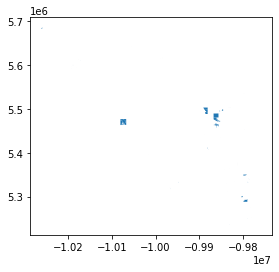

In [54]:
election_only_wards = set(election_wards_and_geoms.keys()) - set(census_2020_wards_and_geoms.keys())
display(Markdown('# Wards in election data but not in census data'))
print(len(election_only_wards))
print(election_only_wards)
election_only_wards_and_geoms = [{'GEOID': ward, 'geometry': election_wards_and_geoms[ward]} for ward in election_only_wards]
print(election_only_wards_and_geoms)
election_only_wards_and_geoms_df = geopandas.GeoDataFrame(election_only_wards_and_geoms)
print(election_only_wards_and_geoms_df.info())
election_only_wards_and_geoms_df.plot()

# Wards in census data but not in election data

144
{'55131805750031', '55139508250005', '55133205500006', '55139605000023', '55139828750003', '55089511500022', '55139884750003', '55045567250003', '55081410000003', '55025827500016', '55039263000009', '55139508250001', '55079294000014', '55105816500008', '55035815500045', '55025211000015', '55017145750010', '55139605000025', '55079273000024', '55105810500024', '55141301250017', '55095810750002', '55017145750009', '55025111500013', '55035815500019', '55127221000006', '55081800750005', '55119504500008', '55097363500011', '55121445000002', '55079294000013', '55017145750008', '55117875000010', '55139010250019', '55007032250001', '55141496750025', '55035836120027', '55101119500021', '55097363500020', '55035836120039', '55009429000010', '55131330250014', '55127286750005', '55097613250020', '55139269820032', '55105327000026', '55139605000022', '55139605000045', '55025826250105', '55025111500023', '55121785000002', '55009429000012', '55079054500006', '55081753500017', '55097363500017', '5507

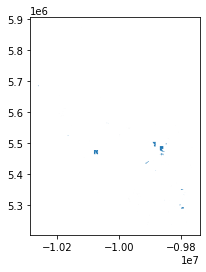

In [55]:
census_only_wards = set(census_2020_wards_and_geoms.keys()) - set(election_wards_and_geoms.keys())   
display(Markdown(('# Wards in census data but not in election data')))
print(len(census_only_wards))
print(census_only_wards)
census_only_wards_and_geoms = [{'GEOID': ward, 'geometry': census_2020_wards_and_geoms[ward]} for ward in census_only_wards]
print(census_only_wards_and_geoms)
census_only_wards_and_geoms_df = geopandas.GeoDataFrame(census_only_wards_and_geoms)
print(census_only_wards_and_geoms_df.info())
census_only_wards_and_geoms_df.plot()




In [26]:
try:
  maup.doctor(election_data)
except AssertionError as e:
  print(e)

100%|██████████| 7078/7078 [00:37<00:00, 189.11it/s]


There are 210 overlaps!


In [27]:
len(election_data['geometry'])

7078

In [11]:
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
maup.progress.enabled = True
without_overlaps_or_gaps = maup.autorepair(election_data)



100%|██████████| 7078/7078 [00:16<00:00, 417.91it/s]
/usr/local/lib/python3.7/dist-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
100%|██████████| 7078/7078 [00:21<00:00, 325.36it/s]
/usr/local/lib/python3.7/dist-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [12]:
without_overlaps_or_gaps.to_file('repaired_2012-2020_Election_Data_with_2020_Wards.zip')

In [ ]:
election_data['geometry'] = without_overlaps_or_gaps

In [ ]:
try:
  maup.doctor(election_data)
except AssertionError as e:
  print(e)

In [ ]:
len(election_data['geometry'])

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7078 entries, 0 to 7077
Data columns (total 279 columns):
 #    Column      Dtype   
---   ------      -----   
 0    FID         int64   
 1    GEOID       object  
 2    CNTY_FIPS   object  
 3    CNTY_NAME   object  
 4    COUSUBFP    object  
 5    MCD_FIPS    object  
 6    MCD_NAME    object  
 7    CTV         object  
 8    LABEL       object  
 9    LSAD        object  
 10   NAME        object  
 11   DISTRICT    object  
 12   ASM         object  
 13   SEN         object  
 14   CON         object  
 15   STR_WARDS   object  
 16   PERSONS     int64   
 17   PERSONS18   int64   
 18   WHITE       int64   
 19   BLACK       int64   
 20   HISPANIC    int64   
 21   ASIAN       int64   
 22   AMINDIAN    int64   
 23   PISLAND     int64   
 24   OTHER       int64   
 25   OTHERMLT    int64   
 26   WHITE18     int64   
 27   BLACK18     int64   
 28   HISPANIC18  int64   
 29   ASIAN18     int64   
 30   AMINDIAN18  in

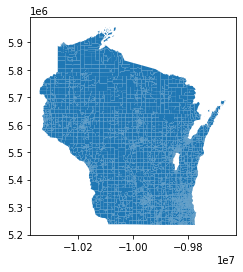

In [18]:
print(election_data.info(verbose=True, show_counts=True, null_counts=True))
election_data.plot()

#graph = gerrychain.Graph.from_geodataframe(without_overlaps_or_gaps_df)
# print(state_election_data.info(verbose=True, null_counts=True))
# print('total population')
# print(state_election_data['PERSONS'].sum())
# graph = gerrychain.Graph.from_file('2012-2020_Election_Data_with_2020_Wards.zip')

#print(list(state_election_data.columns)[0:20])
#print(state_election_data['GEOID'].head())

In [ ]:
state_election_ward_ids = set(state_election_data['GEOID'])
state_ward_ids = set(wards['GEOID'])
wards_only_ward_ids = state_ward_ids - state_election_ward_ids
print(len(wards_only_ward_ids))
state_election_only_ward_ids = state_election_ward_ids - state_ward_ids
print(len(state_election_only_ward_ids))

In [ ]:
print(len([(1056, 1153), (5177, 5181), (4322, 4326), (795, 814), (1956, 1957), (4541, 4542), (2850, 2851), (1805, 1875), (586, 800), (5859, 5861), (6902, 6915), (793, 811), (5176, 5181), (5626, 5627), (5519, 5570), (6066, 6082), (2260, 2261), (5172, 5173), (5453, 5465), (5766, 5770), (5820, 5834), (6964, 6965), (5103, 5149), (6910, 6928), (1056, 1065), (2693, 2785), (1407, 1418), (2511, 2545), (2955, 3014), (5407, 5436), (5524, 5531), (3021, 3023), (824, 826), (1336, 1391), (1360, 1410), (2062, 2063), (5746, 5747), (6864, 6867), (2149, 2152), (5001, 5031), (2337, 2338), (3890, 3895), (2775, 2780), (5710, 5721), (2113, 2119), (3019, 3023), (43, 57), (5327, 5328), (1814, 1815), (4970, 4971), (3900, 3965), (5524, 5533), (6920, 6921), (5755, 5759), (1380, 1409), (1041, 1092), (2760, 2788), (2836, 2837), (83, 89), (493, 531), (1058, 1071), (5457, 5499), (475, 476), (140, 149), (1740, 1742), (5172, 5174), (93, 147), (1711, 1716), (2148, 2152), (3882, 3914), (4968, 4971), (1058, 1099), (4562, 4612), (5452, 5465), (6785, 6828), (2864, 2881), (2284, 2308), (3022, 3023), (1056, 1066), (3906, 3907), (5568, 5631), (6722, 6723), (6911, 6932), (2007, 2008), (2131, 2132), (2631, 2633), (85, 89), (2266, 2267), (1741, 1742), (6684, 6812), (6749, 6752), (825, 826), (1053, 1153), (6859, 6868), (6116, 6307), (2847, 2849), (4900, 5308), (590, 606), (5342, 5390), (716, 762), (1059, 1098), (6717, 6718), (474, 476), (2525, 2550), (6785, 6821), (1341, 1442), (1966, 1967), (3905, 3910), (3998, 3999), (5518, 5570), (4730, 4748), (2848, 2849), (2846, 2849), (4179, 4284), (2966, 2971), (5468, 5475), (5712, 5721), (551, 552), (6615, 6712), (87, 89), (6599, 6606), (276, 278), (5175, 5181), (1041, 1153), (3049, 3050), (3074, 3075), (1041, 1068), (1115, 1123), (3020, 3023), (82, 89), (5165, 5166), (5178, 5181), (1062, 1151), (3922, 3940), (5552, 5565), (5520, 5564), (2032, 2038), (2179, 2194), (1259, 1268), (4898, 5307), (6735, 6736), (4160, 4315), (84, 89), (5110, 5111), (6684, 6813), (6588, 6601), (1024, 1106), (2763, 2775), (6129, 6134), (81, 89), (1958, 2040), (2027, 2030), (4460, 4490), (447, 448), (1343, 1344), (5524, 5530), (2490, 2830), (2886, 2887), (844, 1198), (4324, 4326), (6901, 6912), (108, 109), (6785, 6820), (5653, 5673), (7015, 7038), (4883, 4889), (1058, 1091), (4969, 4971), (6785, 6825), (944, 948), (2031, 2032), (2336, 2338), (1663, 1802), (3882, 3932), (4296, 4303), (5569, 5631), (6191, 6225), (5711, 5721), (4453, 4454), (6900, 6914), (1824, 1875), (1965, 1967), (3885, 3975), (830, 831), (1854, 1855), (4686, 4687), (6983, 7007), (5858, 5861), (4563, 4564), (455, 457), (2017, 2018), (2369, 2421), (86, 89), (5131, 5137), (5402, 5403), (1062, 1094), (789, 790), (2537, 2607), (1057, 1070), (5099, 5148), (2154, 2169), (1944, 1945), (4437, 4452), (5524, 5532), (4323, 4326), (1872, 1876), (6883, 6919), (4048, 4088), (2043, 2044), (2688, 2690)]))
wards[~wards['GEOID'].isin(wards_only_ward_ids)].plot()
# wards_only_ward_ids = pandas.DataFrame({
#     'GEOID': np.array(list(wards_only_ward_ids), dtype=object)
# })

# print(wards_only_ward_ids.info())
# outlier_wards = pandas.merge(wards, state_election_data, on='GEOID', how = 'outer')
# print(len(outlier_wards))
# outlier_wards.plot()
# print(wards_only_ward_ids)